# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [6]:
%pylab inline
import numpy as np
from sklearn import svm

# importing learning functions
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV #to tune parameters using cross-validation
from scipy.spatial import distance #to calculate the Euclidean distance
from collections import Counter #to count unique occurances of items in array, for majority voting
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.datasets import load_digits # the dataset

# load mnist dataset and split in train and test set.
digits = load_digits()
x_train_mnist = reshape(digits.images[:1500],(1500,64))
x_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]

# your implementation here

Populating the interactive namespace from numpy and matplotlib


In [7]:
# I first want to see what my data looks like
print(shape(x_train_mnist))
print(shape(x_test_mnist))


(1500, 64)
(297, 64)


In [8]:
# normalisation of the input, in order to prevent biasing the learning process. 
# I have made a general function, because this needs to happen for the train and test set
def standard(x):
    x = x - mean(x)
    x = x/ std(x)
    return x

In [9]:
# normalisation
x_train_mnist = standard(x_train_mnist)
x_test_mnist = standard(x_test_mnist)
# I want to see whether it outputs what I want
print(x_train_mnist)

[[-0.8135586  -0.8135586   0.01971206 ..., -0.8135586  -0.8135586
  -0.8135586 ]
 [-0.8135586  -0.8135586  -0.8135586  ...,  0.85298272 -0.8135586
  -0.8135586 ]
 [-0.8135586  -0.8135586  -0.8135586  ...,  1.85290751  0.68632859
  -0.8135586 ]
 ..., 
 [-0.8135586  -0.8135586  -0.8135586  ...,  0.68632859 -0.8135586
  -0.8135586 ]
 [-0.8135586  -0.64690447  0.68632859 ...,  0.68632859 -0.64690447
  -0.8135586 ]
 [-0.8135586   0.01971206  1.85290751 ...,  0.51967445  0.18636619
  -0.8135586 ]]


In [10]:
# logistic regression: default parameters
LR = LogisticRegression()
print(LR.fit(x_train_mnist, y_train_mnist, sample_weight=None))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [11]:
print("traininset prediction scores are:")
print(LR.score(x_train_mnist, y_train_mnist, sample_weight=None))

traininset prediction scores are:
0.988666666667


In [12]:
# split my training set into 10 folds, in order to get a better fit in classifcation
k_fold = KFold(n_splits=10)
k_fold.split(x_train_mnist)

<generator object _BaseKFold.split at 0x000001821B6BC150>

In [89]:
# testing logistic regression over different values of C: regularisatoin parameter
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] }
grid = GridSearchCV(estimator=LR, param_grid=param_grid)
grid.fit(x_train_mnist, y_train_mnist)
clf = GridSearchCV(LR, param_grid)

In [90]:
print(grid.best_score_)
# I want to find the best parameter, so that the model will fit the data well. 
print(grid.best_estimator_)

0.932
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [15]:
# k-Nearest Neighbor: default setting with 2 nearest neighbors
KNN = KNeighborsClassifier(n_neighbors=2)
print(KNN.fit(x_train_mnist, y_train_mnist))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')


In [16]:
print("KNN trainingset prediction scores are:")
print(KNN.score(x_train_mnist, y_train_mnist))

KNN traininset prediction scores are:
0.991333333333


In [17]:
# testing k-nearest neighbor over different values of k: the number of neighbors
param_grid = { 'n_neighbors' : [1,2,3,4,5,6]}
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(x_train_mnist, y_train_mnist)
clf = GridSearchCV(KNN, param_grid)

In [18]:
# I want to find the best parameter, so that the model will fit the data well.
print(grid.best_score_)
print(grid.best_estimator_)

0.960666666667
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


## Results and analysis of the experiment

In [63]:
#Now I will plot accuracies for different values of K in my CV set for KNN classification
def accuracies():
    score = np.array([])
    for k in np.array([1,2,3,4,5,6]):
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(x_train_mnist, y_train_mnist)
        score = np.append(score, KNN.score(x_train_mnist,y_train_mnist,sample_weight=None))
    return score
        

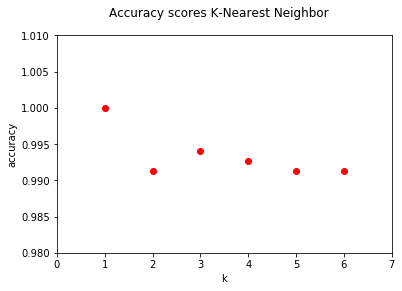

In [71]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5, 6], accuracies(), 'ro')
plt.axis([0, 7, 0.98, 1.01])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.suptitle('Accuracy scores K-Nearest Neighbor')
plt.show()

In [78]:
#plot the average cross valildation errors (or accuracies) for different values of the parameter that you used
def accuraciesLR():
    score = np.array([])
    for c in np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100]):
        LR = LogisticRegression(C=c)
        LR.fit(x_train_mnist, y_train_mnist)
        score = np.append(score, LR.score(x_train_mnist,y_train_mnist,sample_weight=None))
    return score

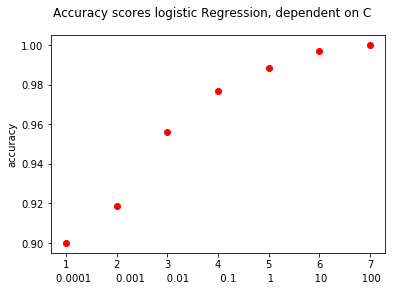

In [96]:
plt.plot([1,2,3,4,5,6,7], accuraciesLR(), 'ro')
plt.xlabel('0.0001        0.001       0.01          0.1          1             10           100')
plt.ylabel('accuracy')
plt.suptitle('Accuracy scores logistic Regression, dependent on C')
plt.show()

In [21]:
# Using the optimal parameter to create a new model with LR. 
LR = LogisticRegression(C=1)
print(LR.fit(x_train_mnist, y_train_mnist, sample_weight=None))
print("LR trainingset prediction scores using optimised C are:")
print(LR.score(x_train_mnist, y_train_mnist, sample_weight=None))
# I also want to use this optimised model on the test set, to do a final test of my LR model
print("LR testset prediction scores using optimised C are:")
print(LR.score(x_test_mnist, y_test_mnist, sample_weight=None))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LR trainingset prediction scores using optimised C are:
0.988666666667
LR testset prediction scores using optimised C are:
0.895622895623


In [108]:
# Using the optimal parameter to create a new model with kNN. 
KNN = KNeighborsClassifier(n_neighbors=1)
print(KNN.fit(x_train_mnist, y_train_mnist))
print("KNN trainingset prediction scores using optimised k are:")
print(KNN.score(x_train_mnist, y_train_mnist, sample_weight=None))
# I also want to use this optimised model on the test set, to do a final test of my KNN model
print("KNN testset prediction scores using optimised k are:")
print(KNN.score(x_test_mnist, y_test_mnist, sample_weight=None))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
KNN trainingset prediction scores using optimised k are:
1.0
KNN testset prediction scores using optimised k are:
0.942760942761


In [119]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test_mnist
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train_mnist, y_train_mnist)
y_pred = KNN.predict(x_test_mnist)
score = precision_recall_fscore_support(y_true, y_pred, average=None)
print("k-NearestNeighbor scores: ")
print("precision =" , average(score[0]))
print("recall =" , average(score[1]))
print("fscore =" , average(score[2]))
print("")

LR = LogisticRegression(C=1)
LR.fit(x_train_mnist, y_train_mnist, sample_weight=None)
y_pred = LR.predict(x_test_mnist)
score = precision_recall_fscore_support(y_true, y_pred, average=None)
print("Logistic Regression scores: ")
print("precision =" , average(score[0]))
print("recall =" , average(score[1]))
print("fscore =" , average(score[2]))

k-NearestNeighbor scores: 
precision = 0.945756665325
recall = 0.943612623935
fscore = 0.942691278818

Logistic Regression scores: 
precision = 0.900340706582
recall = 0.897804465546
fscore = 0.89570003054


# analysis

In this experiment, I have prepared the data through sorting they training- and testsets and regularising their values. The initial classification tasks had high prediction scores (LR = 0.99, KNN = 0.99) This was mainly because the model was tested on the same data it was trained on. After the data set was split into 10 folds, using the k_fold method, the models are less prone to overfitting, because it is using a cross-validation method and thus not testing on the same data as trained on. This explains why, even after some parameters were optimised, the prediction scores for both LR and k-NN were lower (LR = 0.93, KNN = 0.96). These were, although more realistic than the initial scores, still based on the training/cross-validation set. I visualised the cross-validation process for both classification methods in graphs. Then I tested the models on the testset. This yielded a prediction score of 0.90 for LR and 0.94 for KNN. 

In the overview we can see that for the k-NN model, precision, recall and fscore all approximately have the same value. Precision is the proportion of true positives to false positives. Recall is the proportion of true positives to false negatives. This means that the number of false positives and false negatives is approximately the same. The f-score gives the weighted harmonic mean of the precision and the proportion. 

For the LR model, precision is slightly higher than the recall. This means that the number of false positives is slightly higher than false negatives. 

The k-Nearest Neighbor classification model performs better on this data. All test scores are higher than the test scores of Logistic Regression. 
